In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/Boston.csv")
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [2]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
PRICE      0
dtype: int64


In [3]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


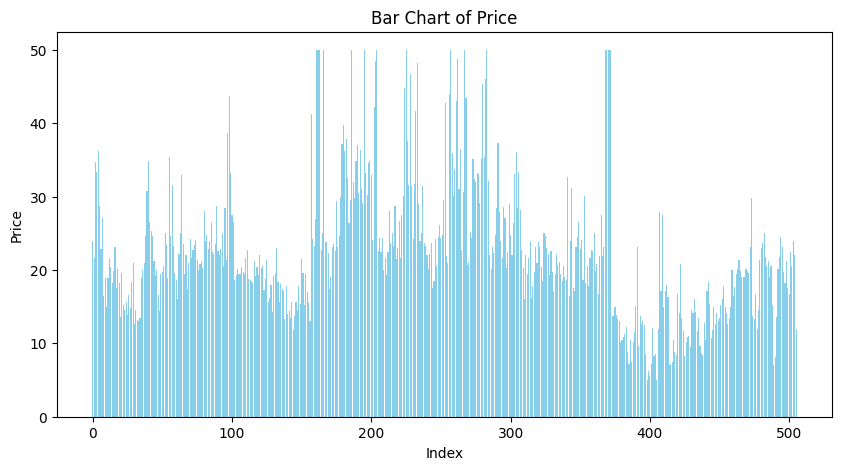

In [4]:
plt.figure(figsize=(10, 5))
plt.bar(df.index, df["PRICE"], color='skyblue')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Bar Chart of Price')
plt.show()


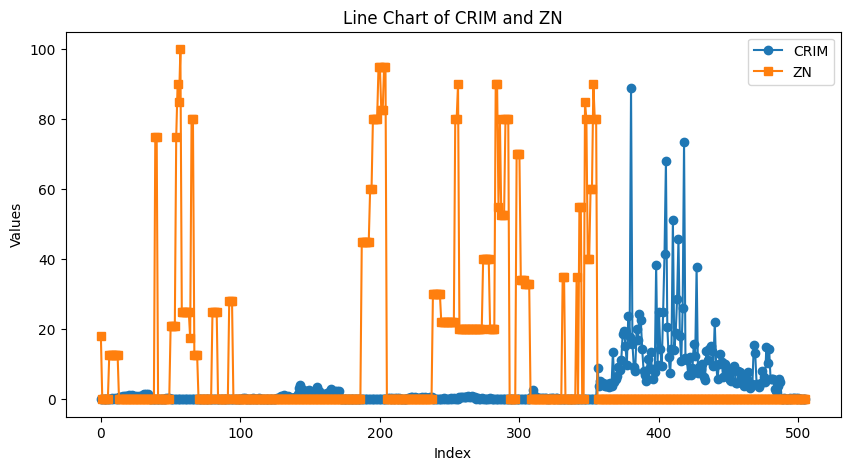

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["CRIM"], marker='o', label='CRIM')
plt.plot(df.index, df["ZN"], marker='s', label='ZN')
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Line Chart of CRIM and ZN')
plt.legend()
plt.show()


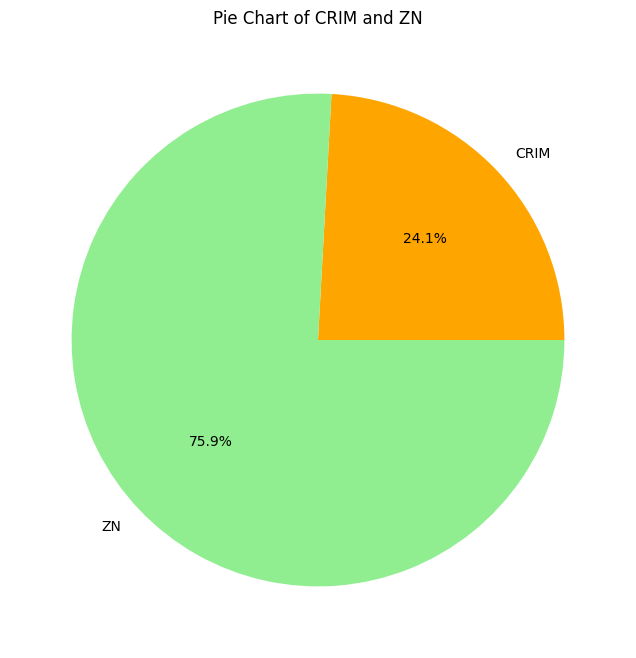

In [6]:
plt.figure(figsize=(8, 8))
df_sum = df[['CRIM', 'ZN']].sum()
plt.pie(df_sum, labels=df_sum.index, autopct='%1.1f%%', colors=['orange', 'lightgreen'])
plt.title('Pie Chart of CRIM and ZN')
plt.show()


In [7]:
X = df[['RM']]
Y= df['PRICE']


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train,Y_train)


LinearRegression()

In [17]:
poly =  PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
model_poly = LinearRegression()
model_poly.fit(X_train_poly,Y_train)
Y_pred_poly = model_poly.predict(X_test_poly)
Y_pred_poly

array([22.57044085, 25.89363925, 19.09936696, 19.69354895, 21.53450285,
       21.38321761, 18.62224744, 20.52906029, 20.97044158, 19.41452738,
       18.87549604, 19.24872456, 13.45760258, 20.99489874, 17.32211331,
       28.32555269, 18.38821771, 13.97502443, 40.32360816, 20.61627449,
       21.06031093, 23.17178765, 17.35146465, 24.22625593, 19.26305004,
       15.84891892, 18.35522376, 25.58159155, 18.93800551, 17.84224211,
       16.56583571, 22.66032517, 32.37897075, 15.55749524, 19.24156841,
       17.3279748 , 30.76332053, 18.32233953, 19.68612508, 21.10133618,
       15.68075825, 26.86434588, 42.82284781, 16.68267131, 22.57940953,
       17.35146465, 17.28120576, 22.57940953, 20.47383684, 24.05158774,
       19.28457116, 28.18856816, 20.27836569, 26.13555073, 34.4588527 ,
       21.6616601 , 20.88920298, 26.99506336, 22.32994534, 16.74188566,
       25.93554404, 31.5621576 , 23.83046987, 15.9849205 , 24.09028001,
       15.48007165, 23.0702356 , 21.57677888, 24.24575128, 19.05

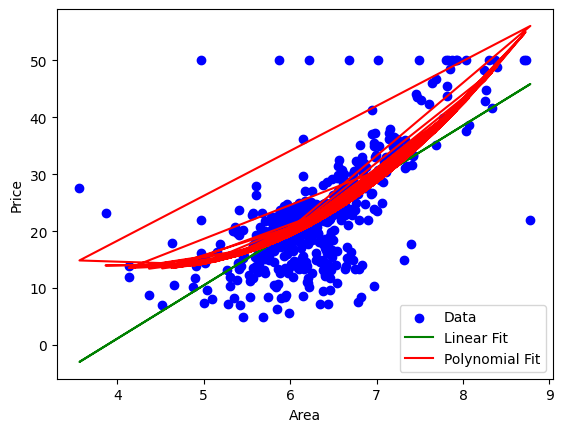

In [15]:
plt.scatter(X, Y, color='blue', label='Data')
plt.plot(X, model.predict(X), color='green', label='Linear Fit')
plt.plot(X, model_poly.predict(poly.transform(X)), color='red', label='Polynomial Fit')
plt.xlabel('Area')
plt.ylabel('Price')
plt.legend()
plt.show()